## Assignment 1

Yana RAGOZINA - Thomas PAUL

SI5 IAID FISA

In [97]:
import numpy as np

### Exercise 1

In [98]:
def f(x):
    return 2*x**4 - 4*x**3 + 3*x**2 + 4*x - 3

In [99]:
## 1. derivative
def der_f(x):
    return 8*x**3 - 12*x**2 + 6*x + 4

In [100]:
## 2. gradient descent algorithm

alpha = 0.1

def gradient_descent(x):
    x = x - alpha * der_f(x)
    return x

In [101]:
## 3. 

## case 1 : x = 0

x = 0

# step 1:
x = gradient_descent(x)

print("x = 0, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 0, step 2 : ", x)



## case 2 : x = 10

x = 10

# step 1:
x = gradient_descent(x)

print("x = 10, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 10, step 2 : ", x)

x = 0, step 1 :  -0.4
x = 0, step 2 :  -0.31679999999999997
x = 10, step 1 :  -676.4000000000001
x = 10, step 2 :  248120326.78720012


### Exercise 2

#### Example 1 - linear samples

In [102]:
alpha = 0.1

X = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])
y_true = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

In [103]:
def h_theta(theta0, theta1, j):
    return theta0 + theta1 * j

1. simultaneous updates

In [104]:
def linear_regression_sim(theta0, theta1, x, y):

    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1



1. a. mini-batch gradient descent

In [105]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -9.26  theta1 =  -499.70000000000005
epoch  1  theta0 =  1263.4440000000002  theta1 =  62381.6984
epoch  2  theta0 =  -157309.874336  theta1 =  -7772100.326496
epoch  3  theta0 =  19599558.48239744  theta1 =  968337067.2826253
epoch  4  theta0 =  -2441936545.7237105  theta1 =  -120646481112.38347
epoch  5  theta0 =  304244319136.8427  theta1 =  15031515276687.918
epoch  6  theta0 =  -37906228915561.62  theta1 =  -1872797693129195.8
epoch  7  theta0 =  4722790534524153.0  theta1 =  2.333345065237557e+17
epoch  8  theta0 =  -5.884191350892678e+17  theta1 =  -2.9071475330426237e+19
epoch  9  theta0 =  7.3311970117702296e+19  theta1 =  3.62205612225441e+21
epoch  10  theta0 =  -9.134041777420269e+21  theta1 =  -4.512770818696632e+23
epoch  11  theta0 =  1.1380231503492664e+24  theta1 =  5.622524824216252e+25
epoch  12  theta0 =  -1.4178790969977846e+26  theta1 =  -7.005182994880809e+27
epoch  13  theta0 =  1.7665555688267458e+28  theta1 =  8.727856314730936e+29
epoch  1

1. b. batch gradient descent

In [106]:

# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -10.91818181818182  theta1 =  -741.7727272727274
epoch  1  theta0 =  2184.7294214876038  theta1 =  137412.45041322315
epoch  2  theta0 =  -404022.1197415478  theta1 =  -25421326.23380917
epoch  3  theta0 =  74744846.91939607  theta1 =  4702983726.097851
epoch  4  theta0 =  -13827908825.561647  theta1 =  -870059054202.3143
epoch  5  theta0 =  2558183905839.5146  theta1 =  160962232073953.2
epoch  6  theta0 =  -473267865612330.44  theta1 =  -2.9778254739217776e+16
epoch  7  theta0 =  8.755526610500142e+16  theta1 =  5.509021861142816e+18
epoch  8  theta0 =  -1.6197855759336546e+19  theta1 =  -1.0191773202403154e+21
epoch  9  theta0 =  2.996627648708438e+21  theta1 =  1.885493353037364e+23
epoch  10  theta0 =  -5.543806166953836e+23  theta1 =  -3.488191027945771e+25
epoch  11  theta0 =  1.0256124690700832e+26  theta1 =  6.453205803054483e+27
epoch  12  theta0 =  -1.8973984750444666e+28  theta1 =  -1.1938527678944386e+30
epoch  13  theta0 =  3.5102156825036237e+30  thet

1. c. stochastic gradient descent

In [107]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -13.9  theta1 =  -546.3000000000001
epoch  1  theta0 =  1629.3900000000006  theta1 =  48752.400000000016
epoch  2  theta0 =  -178913.72900000005  theta1 =  -6631343.003000001
epoch  3  theta0 =  2491515.245100001  theta1 =  4050372.8934000013
epoch  4  theta0 =  -12744012.284990003  theta1 =  -559664145.7199303
epoch  5  theta0 =  436261706.3194533  theta1 =  3032381603.1156163
epoch  6  theta0 =  89397375.4759463  theta1 =  2685517272.2721095
epoch  7  theta0 =  -18986714988.103626  theta1 =  -1351718460541.8774
epoch  8  theta0 =  7417363489496.534  theta1 =  407647542786113.2
epoch  9  theta0 =  -2887621926640849.5  theta1 =  -2.0514014205646845e+17
epoch  10  theta0 =  7.564196658749565e+17  theta1 =  2.7889229506602635e+19
epoch  11  theta0 =  -7.685991152693331e+18  theta1 =  2.5619970508977725e+18
epoch  12  theta0 =  -2.5107571098798182e+19  theta1 =  -1.2343701791225466e+21
epoch  13  theta0 =  1.2197667959324293e+22  theta1 =  1.2088204073327635e+24
epoch 

2. non-simultaneous updates

In [108]:
def h(x, theta0, theta1):
    #calculate the estimated values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    return y_pred

In [109]:
def linear_regression_nsim(param, theta0, theta1, x, y):

    y_pred = h(x, theta0, theta1)

    #non-simultaneous parameter update
    if param == 0:
        theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    else:
        theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

2. a. mini-batch gradient descent

In [110]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -1.986090175548076e+71  theta1 =  -8.565922612560476e+72
epoch  1  theta0 =  2.586165662638452e+73  theta1 =  1.1171833605692337e+75
epoch  2  theta0 =  -3.3729619251667244e+75  theta1 =  -1.4570499288295817e+77
epoch  3  theta0 =  4.3990751263154274e+77  theta1 =  1.900309816806107e+79
epoch  4  theta0 =  -5.737350166953726e+79  theta1 =  -2.4784170591859326e+81
epoch  5  theta0 =  7.4827517084226515e+81  theta1 =  3.2323945626875133e+83
epoch  6  theta0 =  -9.75913470519424e+83  theta1 =  -4.215745114473865e+85
epoch  7  theta0 =  1.2728032935653802e+86  theta1 =  5.49824797856164e+87
epoch  8  theta0 =  -1.66001215584065e+88  theta1 =  -7.17091048269649e+89
epoch  9  theta0 =  2.165016677337167e+90  theta1 =  9.352425963933803e+91
epoch  10  theta0 =  -2.823652342939841e+92  theta1 =  -1.2197596333397876e+94
epoch  11  theta0 =  3.6826564142664965e+94  theta1 =  1.5908316931486423e+96
epoch  12  theta0 =  -4.802984439443475e+96  theta1 =  -2.074790316676423e+98
e

2. b. batch gradient descent

In [111]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -10.91818181818182  theta1 =  -706.5599173553719
epoch  1  theta0 =  2080.691574004508  theta1 =  124719.9250640325
epoch  2  theta0 =  -366615.11072712834  theta1 =  -21984150.085831136
epoch  3  theta0 =  64623220.063028485  theta1 =  3875136431.1886387
epoch  4  theta0 =  -11391105827.500618  theta1 =  -683068557074.0015
epoch  5  theta0 =  2007905105204.1174  theta1 =  120404187586360.7
epoch  6  theta0 =  -353932530546833.6  theta1 =  -2.1223592036516068e+16
epoch  7  theta0 =  6.23875281031235e+16  theta1 =  3.74107303044913e+18
epoch  8  theta0 =  -1.0997021541943255e+19  theta1 =  -6.594372618486908e+20
epoch  9  theta0 =  1.9384400451652013e+21  theta1 =  1.1623870979666296e+23
epoch  10  theta0 =  -3.4168795563131005e+23  theta1 =  -2.0489345138481207e+25
epoch  11  theta0 =  6.022918238544448e+25  theta1 =  3.6116476597011883e+27
epoch  12  theta0 =  -1.0616570912242974e+28  theta1 =  -6.366235099103794e+29
epoch  13  theta0 =  1.8713781836414657e+30  the

2. c. stochastic gradient descent

In [112]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -0.30000000000000004  theta1 =  1.4900000000000002
epoch  1  theta0 =  -0.31900000000000006  theta1 =  1.4729
epoch  2  theta0 =  -0.4762600000000001  theta1 =  0.9067639999999999
epoch  3  theta0 =  -0.4006632000000001  theta1 =  1.11087536
epoch  4  theta0 =  -1.458262944000001  theta1 =  -93.12126183040009
epoch  5  theta0 =  346.93623212288037  theta1 =  11508.415423896715
epoch  6  theta0 =  -34210.00366277955  theta1 =  -921528.961738469
epoch  7  theta0 =  245669.9852250391  theta1 =  -165852.99174135865
epoch  8  theta0 =  1863057.504941986  theta1 =  143943375.01503858
epoch  9  theta0 =  -214238309.2681101  theta1 =  -2773425076.4211645
epoch  10  theta0 =  2025925583.5956323  theta1 =  13355754952.197784
epoch  11  theta0 =  -93002527128.2682  theta1 =  -6058962373335.901
epoch  12  theta0 =  59900025221619.89  theta1 =  5339319810040125.0
epoch  13  theta0 =  -5.280535609669778e+16  theta1 =  -4.704955000652977e+18
epoch  14  theta0 =  4.229706795782697e

#### Example 2 - few linear samples 

In [113]:
alpha = 0.1

X = np.array([1, 2, 3, 4])
y_true = np.array([1, 2, 3, 4])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

1. simultaneous updates

1. a. mini-batch gradient descent

In [114]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.019999999999999907  theta1 =  2.3
epoch  1  theta0 =  -0.26800000000000007  theta1 =  1.4895999999999998
epoch  2  theta0 =  -0.34891200000000006  theta1 =  1.245008
epoch  3  theta0 =  -0.36792256  theta1 =  1.16986368
epoch  4  theta0 =  -0.3685003136  theta1 =  1.1454911616
epoch  5  theta0 =  -0.363658337792  theta1 =  1.1363567104
epoch  6  theta0 =  -0.35729098030080003  theta1 =  1.13182038426624
epoch  7  theta0 =  -0.3505623668092928  theta1 =  1.1286957616873472
epoch  8  theta0 =  -0.3438191976995799  theta1 =  1.1260281101392364
epoch  9  theta0 =  -0.33716346216025395  theta1 =  1.1235309053468174
epoch  10  theta0 =  -0.33062391512052836  theta1 =  1.1211177057070465
epoch  11  theta0 =  -0.32420741886402576  theta1 =  1.118761989495194
epoch  12  theta0 =  -0.31791431466656583  theta1 =  1.1164551881582594
epoch  13  theta0 =  -0.3117430245947263  theta1 =  1.1141941207267831
epoch  14  theta0 =  -0.305691428695146  theta1 =  1.1119772312870173
epoc

1. b. batch gradient descent

In [115]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -0.10000000000000009  theta1 =  1.75
epoch  1  theta0 =  -0.2775000000000001  theta1 =  1.2125
epoch  2  theta0 =  -0.30287500000000006  theta1 =  1.1225
epoch  3  theta0 =  -0.30321250000000005  theta1 =  1.10634375
epoch  4  theta0 =  -0.2994771875000001  theta1 =  1.1023890625
epoch  5  theta0 =  -0.29512673437500003  theta1 =  1.1004665625
epoch  6  theta0 =  -0.2907307015625  theta1 =  1.09889832421875
epoch  7  theta0 =  -0.28638221246093754  theta1 =  1.0974072564453123
epoch  8  theta0 =  -0.28209580532617184  theta1 =  1.0959473672265625
epoch  9  theta0 =  -0.2778730666001953  theta1 =  1.0945107931381837
epoch  10  theta0 =  -0.2737134582247217  theta1 =  1.0930959649345948
epoch  11  theta0 =  -0.2696161036358982  theta1 =  1.091702355789829
epoch  12  theta0 =  -0.2655800822197657  theta1 =  1.0903296148564319
epoch  13  theta0 =  -0.2616044777118971  theta1 =  1.0889774242690495
epoch  14  theta0 =  -0.2576883860079698  theta1 =  1.0876454754952367
epo

1. c. stochastic gradient descent

In [116]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -0.30000000000000004  theta1 =  1.0999999999999996
epoch  1  theta0 =  -0.28  theta1 =  1.1199999999999997
epoch  2  theta0 =  -0.264  theta1 =  1.1359999999999997
epoch  3  theta0 =  -0.2647999999999999  theta1 =  1.1343999999999999
epoch  4  theta0 =  -0.2786399999999999  theta1 =  1.0928799999999999
epoch  5  theta0 =  -0.27863999999999983  theta1 =  1.09288
epoch  6  theta0 =  -0.26935199999999987  theta1 =  1.111456
epoch  7  theta0 =  -0.2535623999999999  theta1 =  1.1272456
epoch  8  theta0 =  -0.2536552799999999  theta1 =  1.12705984
epoch  9  theta0 =  -0.25370171999999996  theta1 =  1.12696696
epoch  10  theta0 =  -0.24102824399999997  theta1 =  1.139640436
epoch  11  theta0 =  -0.272781594  theta1 =  1.0126270359999998
epoch  12  theta0 =  -0.24676613819999998  theta1 =  1.0386424918
epoch  13  theta0 =  -0.23368227191999993  theta1 =  1.07789409064
epoch  14  theta0 =  -0.22589286285599994  theta1 =  1.093472908768
epoch  15  theta0 =  -0.231345449200799

2. non-simultaneous parameter updates

2. a. mini-batch gradient descent

In [117]:
# mini-batch gradient descent

#create a random batch
batch_size = 5
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -0.1295825448673795  theta1 =  1.064622561136459
epoch  1  theta0 =  -0.12825635138520416  theta1 =  1.0631521311539414
epoch  2  theta0 =  -0.1267980998543932  theta1 =  1.0619779792892343
epoch  3  theta0 =  -0.12527432614101605  theta1 =  1.0609757258647081
epoch  4  theta0 =  -0.12372252418256191  theta1 =  1.0600750043889802
epoch  5  theta0 =  -0.12216377255432215  theta1 =  1.0592359817809458
epoch  6  theta0 =  -0.12060987201946018  theta1 =  1.0584360856676893
epoch  7  theta0 =  -0.11906738023769824  theta1 =  1.0576625015567531
epoch  8  theta0 =  -0.11753989249414398  theta1 =  1.0569079316141328
epoch  9  theta0 =  -0.11602933093527348  theta1 =  1.0561681971691115
epoch  10  theta0 =  -0.11453667333218619  theta1 =  1.0554408834446427
epoch  11  theta0 =  -0.11306236501900326  theta1 =  1.054724573439099
epoch  12  theta0 =  -0.11160655173614077  theta1 =  1.0540184148447467
epoch  13  theta0 =  -0.1101692112345811  theta1 =  1.0533218752259674
epoch  

2. a. batch gradient descent

In [118]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  -0.10000000000000009  theta1 =  2.025
epoch  1  theta0 =  -0.34625000000000006  theta1 =  1.3428125
epoch  2  theta0 =  -0.39732812500000003  theta1 =  1.1850351562499999
epoch  3  theta0 =  -0.4038541015625  theta1 =  1.1472223144531248
epoch  4  theta0 =  -0.4002742700195312  theta1 =  1.136874146118164
epoch  5  theta0 =  -0.3944653795471191  theta1 =  1.1328348814163207
epoch  6  theta0 =  -0.38822756194648733  theta1 =  1.130265610840702
epoch  7  theta0 =  -0.38197120846201416  theta1 =  1.128059204825679
epoch  8  theta0 =  -0.3757888888222325  theta1 =  1.1259620234119778
epoch  9  theta0 =  -0.3697005057930037  theta1 =  1.1239156323012454
epoch  10  theta0 =  -0.36370936328901465  theta1 =  1.121906248897565
epoch  11  theta0 =  -0.35781498918450444  theta1 =  1.1199303095205173
epoch  12  theta0 =  -0.3520160676461833  theta1 =  1.1179865942916751
epoch  13  theta0 =  -0.3463111094544838  theta1 =  1.1160744259365396
epoch  14  theta0 =  -0.34069860499317

2. c. stochastic gradient descent

In [119]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.5  theta1 =  4.55
epoch  1  theta0 =  -0.615  theta1 =  1.5394999999999999
epoch  2  theta0 =  -0.6614  theta1 =  1.4559799999999998
epoch  3  theta0 =  -0.6408579999999999  theta1 =  1.4744677999999998
epoch  4  theta0 =  -0.7191125399999999  theta1 =  1.2631805419999997
epoch  5  theta0 =  -0.6998373943999999  theta1 =  1.2978758040799998
epoch  6  theta0 =  -0.6596412353679999  theta1 =  1.3340523472087997
epoch  7  theta0 =  -0.6604875812729598  theta1 =  1.3325289245798717
epoch  8  theta0 =  -0.627691715603651  theta1 =  1.3620452036822497
epoch  9  theta0 =  -0.6735361051479608  theta1 =  1.2382653519126132
epoch  10  theta0 =  -0.70148863539821  theta1 =  1.137636243011716
epoch  11  theta0 =  -0.6726306447619038  theta1 =  1.2155528177297428
epoch  12  theta0 =  -0.6915887073776105  theta1 =  1.1473037923131983
epoch  13  theta0 =  -0.6371602158711692  theta1 =  1.1962894346689954
epoch  14  theta0 =  -0.6519599681516505  theta1 =  1.1430103264592628
epoc

#### Example 3 - complex sample distribution, different parameter initialization

In this part we will compare the mini-batch simultaneous gradient descent convergence with the previous examples

In [123]:
from sklearn import datasets
from matplotlib import pyplot as plt

# Load a toy dataset
diabetes = datasets.load_diabetes(as_frame=True)

In [122]:
#extract the data
X = diabetes['data']['bmi']
y_true = diabetes['target']

X.shape, y_true.shape

((442,), (442,))

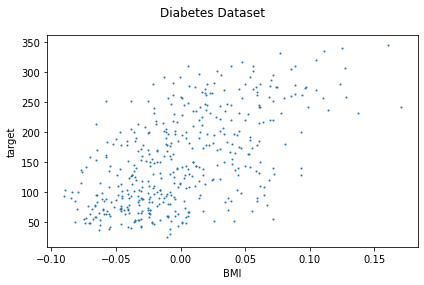

In [125]:
# plot the initial distribution
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
plt.tight_layout()
plt.show()

In [140]:
alpha = 0.1

#random initial parameter initialization
t0 = 12
t1 = 3

nb_epochs = 500

In [130]:
def linear_regression_sim(theta0, theta1, x, y):

    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

In [141]:
# mini-batch gradient descent

#create a random batch
batch_size = 50
random_indices = np.random.choice(len(X), batch_size)
X_batch = []
for i in range(len(random_indices)):
    X_batch.append(X[random_indices[i]])

y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  25.769202165251528  theta1 =  3.255711152815897
epoch  1  theta0 =  38.16158658299868  theta1 =  3.5168816096691224
epoch  2  theta0 =  49.31483721565377  theta1 =  3.7829584047511284
epoch  3  theta0 =  59.352869407802444  theta1 =  4.053443871315285
epoch  4  theta0 =  68.38720677014591  theta1 =  4.327890111681329
epoch  5  theta0 =  76.51822037283289  theta1 =  4.605894020248265
epoch  6  theta0 =  83.83624401746405  theta1 =  4.887092804213994
epoch  7  theta0 =  90.42257798010105  theta1 =  5.171159952230177
epoch  8  theta0 =  96.35039237835917  theta1 =  5.457801606198112
epoch  9  theta0 =  101.68554020033682  theta1 =  5.746753295890857
epoch  10  theta0 =  106.48728902934361  theta1 =  6.037777000118392
epoch  11  theta0 =  110.80897959497793  theta1 =  6.330658501781005
epoch  12  theta0 =  114.69861846803684  theta1 =  6.625205007421589
epoch  13  theta0 =  118.19941148498121  theta1 =  6.92124300482654
epoch  14  theta0 =  121.35024382909569  theta1 = 